In [93]:
!pip install pandas
!pip install -U scikit-learn
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [94]:
from tqdm import *
f1 =open("output1.txt", "r").read()
arr = []
for i in tqdm(f1.split("\n\n")):
    arr.append(i.split("\n"))
arr = arr[:-1]
brr=arr[:]



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 532355/532355 [00:02<00:00, 224623.01it/s]


In [95]:
for i in brr:
    if(i[2]==''):
        print(i)

In [96]:
for i in range(len(brr)):
    for j in range(5, 8):
        brr[i][j] = brr[i][j].split()
        brr[i][j] = brr[i][j][0] + ":" + brr[i][j][1]
#d = {#arr[i][0]:[arr[i][5],arr[i][6],arr[i][7]]}
d = {}
for i in range(len(brr)):
    d[brr[i][0]] = [brr[i][5], brr[i][6], brr[i][7], brr[i][2]]
for i in d:
    d[i][0] = d[i][0].split(":")
    d[i][1] = d[i][1].split(":")
    d[i][2] = d[i][2].split(":")
    k = d[i][-1].split(" ")
    d[i] = {
        d[i][0][0]: float(d[i][0][1]),
        d[i][1][0]: float(d[i][1][1]),
        d[i][2][0]: float(d[i][2][1]),
        k[0]: " ".join(k[i] for i in range(1, len(k))),
    }


In [97]:
g={}
for i in d:
    g[i] = {
        "attr_sum": (5*d[i]['#hi'] + d[i]['#pi'] + d[i]['#upi'])//3,
        "#a": d[i]["#a"],
    }
k = sorted(g.items(), key=lambda x: x[1]["attr_sum"], reverse=True)
x=k[:10000]
at_dic={}
for i in x:
    at_dic[i[0]]={"attr_sum":i[1]['attr_sum']}
    


In [98]:
g['#index 8']

{'attr_sum': 1.0,
 '#a': 'National ChengKung University, Department of Aeronautics and Astronautics, 701, Tainan, Taiwan'}

In [99]:
x[:3]

[('#index 1154038',
  {'attr_sum': 5593.0,
   '#a': 'New South Wales Institute of Technology, Sydney, Australia;Rand Corporation, Santa Monica, CA;<i>Basser Department of Computer Science, University of Sydney, Sydney, Australia 2006</i>. <rfc822>QUINLAN@CS.SU.OZ.AU</rfc822>;University of Washington, Computer Science Group, Seattle, Washington;Executive Director, RuleQuest Research Party Limited, Sydney, Australia;Computer Science Department, CarnegieMellon University, Pittsburgh, Pennsylvania;School of Computing Sciences, New South Wales Institute of Technology, Sydney, Australia and Artificial Intelligence Laboratory, Massachusetts Institute of Technology, Cambridge, MA'}),
 ('#index 804905',
  {'attr_sum': 5071.0,
   '#a': 'Univ. of Michigan, Ann Arbor;<i>The University of Alabama, Tuscaloosa, AL 35487</i>. <rfc822>dgoldber@ualvm.ua.edu</rfc822>;Univ. of Illinois, UrbanaChampaign;University of Illinois, US;Illinois Genetic Algorithms Laboratory, Urbana, IL'}),
 ('#index 115649',
  {

In [100]:
your_dict={}
c=1
for i in at_dic:
    your_dict[f"key{c}"]=at_dic[i]
    c+=1
#print(your_dict)

In [119]:
import pandas as pd
from sklearn.cluster import DBSCAN

attributes = list(your_dict.keys())
values = [item['attr_sum'] for item in your_dict.values()]
threshold =100
df = pd.DataFrame({'attribute': attributes, 'value': values})
df['community'] = (df['value'] - 1) // threshold

dbscan = DBSCAN(eps=1, min_samples=10)
clusters = dbscan.fit_predict(df[['value', 'community']])

df['cluster'] = clusters
df.to_csv('your_output_file.csv', index=False)

In [102]:
your_dict['key14']

{'attr_sum': 3586.0}

In [103]:
c

10001

In [104]:
f"key{c}"

'key10001'

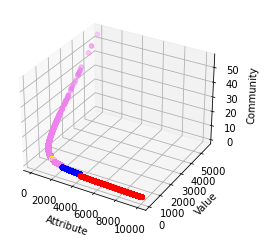

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data from the CSV file
df = pd.read_csv('your_output_file.csv')

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assign different colors to the points based on their cluster labels
colors = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink','violet']
for i in range(-1, max(df['cluster'])+1):
    cluster_data = df[df['cluster']==i]
    ax.scatter(pd.to_numeric(cluster_data['attribute'].str[3:]), pd.to_numeric(cluster_data['value']), cluster_data['community'], c=colors[i % len(colors)])
# Set the axis labels
ax.set_xlabel('Attribute')
ax.set_ylabel('Value')
ax.set_zlabel('Community')

# Show the plot
plt.show()


In [106]:
ls

AMiner-Author.txt        coauthor.csv                   output1.txt
AMiner-Coauthor.txt      fullpaper.csv                  output2.txt
AMiner-Paper.txt         g                              output3.txt
Eigen_Final.ipynb        jaffa/                         paper.txt
a.sage                   kmeans_clustering_results.csv  plotly.png
abrakadabra-Copy1.ipynb  layers-Copy1.ipynb             plotly_x.png
abrakadabra.ipynb        layers.ipynb                   plotly_y.png
author.csv               linkage_matrix.csv             plotly_z.png
b.sage                   new-Copy1.ipynb                simiii.txt
centrality_results.txt   new.ipynb                      similar.csv
cleaning.ipynb           nltk_data/                     your_output_file.csv


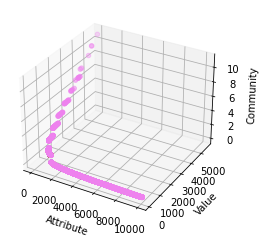

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# Load the data from the CSV file
df = pd.read_csv('your_output_file.csv')

# Create a 3D scatter plot using Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'violet']
for i in range(-1, max(df['cluster'])+1):
    cluster_data = df[df['cluster']==i]
    ax.scatter(pd.to_numeric(cluster_data['attribute'].str[3:]), pd.to_numeric(cluster_data['value']), cluster_data['community'], c=colors[i % len(colors)])
ax.set_xlabel('Attribute')
ax.set_ylabel('Value')
ax.set_zlabel('Community')
plt.show()

# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=df['attribute'].str[3:],
    y=df['value'],
    z=df['community'],
    mode='markers',
    marker=dict(
        color=df['cluster'],
        colorscale='Viridis',
        opacity=0.7,
        symbol='circle'
    )
)])
fig.update_layout(scene=dict(xaxis_title='Attribute', yaxis_title='Value', zaxis_title='Community'))
fig.show()


In [118]:
df

,attribute,value,community,cluster
0,key1,5593.0,11.0,-1
1,key2,5071.0,10.0,-1
2,key3,5046.0,10.0,-1
3,key4,4769.0,9.0,-1
4,key5,4137.0,8.0,-1
...,...,...,...,...
9995,key9996,101.0,0.0,23
9996,key9997,101.0,0.0,23
9997,key9998,101.0,0.0,23
9998,key9999,101.0,0.0,23


In [109]:
import networkx as nx 
import networkx.algorithms.community as nx_comm
Gf = nx.from_pandas_edgelist(df, source='community', target='value')

print(nx_comm.modularity(Gf, nx_comm.label_propagation_communities(Gf)))

0.9287551776340256


In [110]:
Gf.nodes()

NodeView((55.0, 5593.0, 50.0, 5071.0, 5046.0, 47.0, 4769.0, 41.0, 4137.0, 40.0, 4024.0, 39.0, 3993.0, 3971.0, 38.0, 3860.0, 3856.0, 3847.0, 3826.0, 37.0, 3792.0, 35.0, 3586.0, 34.0, 3458.0, 33.0, 3322.0, 32.0, 3216.0, 3202.0, 31.0, 3155.0, 29.0, 2966.0, 2931.0, 28.0, 2895.0, 2859.0, 27.0, 2798.0, 2702.0, 26.0, 2694.0, 2683.0, 2628.0, 25.0, 2593.0, 2583.0, 2582.0, 2574.0, 24.0, 2410.0, 23.0, 2389.0, 2375.0, 2358.0, 22.0, 2245.0, 2227.0, 2206.0, 21.0, 2170.0, 2167.0, 2160.0, 2131.0, 2116.0, 2114.0, 2106.0, 20.0, 2097.0, 2082.0, 2078.0, 2020.0, 2003.0, 19.0, 1995.0, 1991.0, 1987.0, 1953.0, 1922.0, 1905.0, 1903.0, 18.0, 1893.0, 1892.0, 1891.0, 1850.0, 1831.0, 1826.0, 1820.0, 1814.0, 1801.0, 17.0, 1783.0, 1782.0, 1779.0, 1769.0, 1768.0, 1746.0, 1741.0, 1739.0, 1731.0, 1722.0, 1719.0, 1709.0, 1706.0, 1702.0, 16.0, 1700.0, 1693.0, 1668.0, 1656.0, 1640.0, 1635.0, 1627.0, 1626.0, 1621.0, 1619.0, 1616.0, 1614.0, 1610.0, 1605.0, 15.0, 1597.0, 1584.0, 1581.0, 1573.0, 1547.0, 1543.0, 1538.0, 1537.0

In [111]:
# import plotly.io as pio

# fig = go.Figure(data=[go.Scatter3d(
#     x=df['attribute'].str[3:],
#     y=df['value'],
#     z=df['community'],
#     mode='markers',
#     marker=dict(
#         color=df['cluster'],
#         colorscale='Viridis',
#         opacity=0.7,
#         symbol='circle'
#     )
# )])

# fig.update_layout(scene=dict(xaxis_title='Attribute', yaxis_title='Value', zaxis_title='Community'))

# # Save the plot as PNG images for each axis
# pio.to_image(fig.update_layout(scene_camera=dict(up=dict(x=0, y=1, z=0), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=0, z=2))).to_dict(), format='png', width=800, height=600, scale=2).save('plotly_x.png')
# pio.to_image(fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=2, z=0))).to_dict(), format='png', width=800, height=600, scale=2).save('plotly_y.png')
# pio.to_image(fig.update_layout(scene_camera=dict(up=dict(x=0, y=1, z=0), center=dict(x=0, y=0, z=0), eye=dict(x=2, y=0, z=0))).to_dict(), format='png', width=800, height=600, scale=2).save('plotly_z.png')


In [112]:
# import plotly.io as pio

# fig = go.Figure(data=[go.Scatter3d(
#     x=df['attribute'].str[3:],
#     y=df['value'],
#     z=df['community'],
#     mode='markers',
#     marker=dict(
#         color=df['cluster'],
#         colorscale='Viridis',
#         opacity=0.7,
#         symbol='circle'
#     )
# )])

# fig.update_layout(scene=dict(xaxis_title='Attribute', yaxis_title='Value', zaxis_title='Community'))

# pio.write_image(fig, 'plotly.png', width=1200, height=800, scale=2)


In [113]:
%pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [114]:
# import plotly.io as pio

# # Save the plot as PNG images for each axis
# pio.write_image(fig.update_layout(scene_camera=dict(up=dict(x=Integer(0), y=Integer(1), z=Integer(0)), center=dict(x=Integer(0), y=Integer(0), z=Integer(0)), eye=dict(x=Integer(0), y=Integer(0), z=Integer(2)))).to_dict(), file='plotly_x.png', format='png', width=Integer(800), height=Integer(600), scale=Integer(2))
# pio.write_image(fig.update_layout(scene_camera=dict(up=dict(x=Integer(0), y=Integer(0), z=Integer(1)), center=dict(x=Integer(0), y=Integer(0), z=Integer(0)), eye=dict(x=Integer(0), y=Integer(2), z=Integer(0)))).to_dict(), file='plotly_y.png', format='png', width=Integer(800), height=Integer(600), scale=Integer(2))
# pio.write_image(fig.update_layout(scene_camera=dict(up=dict(x=Integer(0), y=Integer(1), z=Integer(0)), center=dict(x=Integer(0), y=Integer(0), z=Integer(0)), eye=dict(x=Integer(2), y=Integer(0), z=Integer(0)))).to_dict(), file='plotly_z.png', format='png', width=Integer(800), height=Integer(600), scale=Integer(2))


In [121]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

data=pd.read_csv('your_output_file.csv')
# label1=data['community']
# label2=data['value']
X = data[['community', 'value']]
dbscan = DBSCAN(eps=1.0, min_samples=10)
dbscan.fit(X)

# Calculate the silhouette score
silhouette = silhouette_score(X, dbscan.labels_)
ch_score = calinski_harabasz_score(X, dbscan.labels_)

print("Silhouette score:", silhouette)
print("calinski",ch_score)

Silhouette score: 0.4846843694246912
calinski 677.0118819834099
